<h1> Problem set 4 </h1> 
<h3>Akshita Gundavarapu </h3> 

<h2> 1 Simulations </h2> 
<h3> 1.1 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
c =  pd.read_csv("data /college-admissions.csv.bz2", sep =",")
c.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [4]:
c = c[['Chance of Admit ', 'Research']]

In [5]:
c = c.rename(columns = {'Chance of Admit ':'Chance'})

In [6]:
c.head(3)

,Chance,Research
0,0.92,1
1,0.76,1
2,0.72,1


In [7]:
c.shape

(400, 2)

In [8]:
c.Research.min(), c.Research.max()

(0, 1)

In [9]:
c.Chance.min(), c.Chance.max()

(0.34, 0.97)

In [10]:
c.dropna().shape

(400, 2)

<h3> 1.2

In [29]:
research = c.loc[c["Research"] > 0, "Chance"]
research.mean(), research.median(), research.std()

(0.7959817351598172, 0.8, 0.12305111802221343)

In [12]:
research.max() - research.min()

0.61

In [13]:
no_research = c.loc[c["Research"] == 0, "Chance"]
no_research.mean(), no_research.median(), no_research.std()

(0.6376795580110497, 0.65, 0.11378404043441828)

In [14]:
no_research.max() - no_research.min()

0.55

According to these figures, which students are more likely to be admitted–researchers or non-researchers?

According to these figures it seems like the researcher students are more liklely to be admitted.


<h3> 1.3 </h3> 


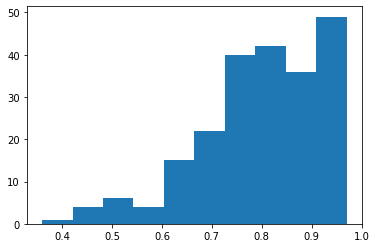

In [15]:
_ = plt.hist(research)

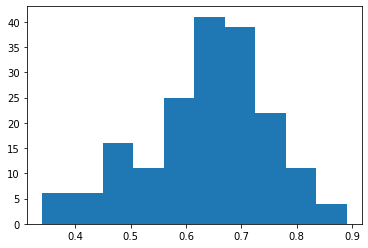

In [16]:
_ = plt.hist(no_research)

Comment its shape. Do you think the chances are normally distributed?

The chances for non-researchers getting admitted seems normally distributed. However the distribution for the chances of researchers getting admitted looks left skewed.
<h3> 1.4 </h3>

In [17]:
mean = research.mean()- no_research.mean()
mean

0.1583021771487675

<h3> 1.5 </h3> 
H0 again: researchers and non-researchers have similar admission chances (in average).



In [18]:
mu = c.Chance.mean()
sigma = c.Chance.std()

<h3> 1.6 </h3> 

In [22]:
research_fake = np.random.normal(mu, sigma, size = 1000)

In [23]:
no_research_fake = np.random.normal(mu, sigma, size = 1000)

In [24]:
research_fake.mean() - no_research_fake.mean()

-0.013193049479884644

What is the difference in the mean admission chances of the fake researchers and fake non- researchers? Compare the result with the real difference you found above.

The fake difference (-0.0009) is lower than the difference calculated from the data (0.158). The fake difference also seems closer to zero than the difference calculated from the data. 

<h3> 1.7 </h3> 

Why do we use the same mean μ0 for both fake researchers and fake non-researchers?

We want to see if on average researchers and non-researchers have similar admission chances. To keep this Hypothesis consistent, we must use the same value of mu for generating both data.

<h3> 1.8 </h3> 


In [25]:
R = 1000
diff = []
for i in range(1, R):
    research_fake = np.random.normal(mu, sigma, size = 1000)
    no_research_fake = np.random.normal(mu, sigma, size = 1000)
    diff.append(research_fake.mean() - no_research_fake.mean())

<h3> 1.9 </h3> 

In [26]:
np.mean(diff)

0.00022202941504467476

Explain why do you get this result.

We get a result close to zero because according to our hypothesis mean of researcher chances and mean of non-researche chances should be equal.

<h3> 1.10

In [27]:
np.max(np.abs(diff))

0.020789087596007838

<h3> 1.11 </h3> 

In [28]:
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(-0.013113381395690649, 0.012954406048072008)

<h3> 1.12 </h3> 
Finally, based on the simulations, what is your conclusion: is the observed difference 0.158 just a random fluke, or do students with research experience 
have better admission chances?

0.158 does not fall under the confidence interval. So with 95% confidence we can reject the null hypothesis that the mean chance of admission of researchers is equal to the mean chance of admission of non-researchers.
<h2> 2 Now repeat the above with t-test </h2> 
<h3> 2.1

In [30]:
s1 = research.std()
s2 = no_research.std()
n1 = research.size
n2 = no_research.size

In [31]:
se = np.sqrt((s1**2/n1) + (s2**2/n2))

In [32]:
se

0.011860394139180394

<h3> 2.2 </h3> 

μ ± tcr ·SE

In [33]:
df = min(n1 - 1, n2 -2)
df

179

In [34]:
tcr = 1.985


In [35]:
mean - (tcr*se), mean + (tcr*se)

(0.1347592947824944, 0.18184505951504057)

<h3> 2.3 </h3> 
What will you conclude based on CI: can you reject H0 that nonresearchers and re- searchers have equal admission chance at 5% level?
The confidence interval does not contain zero. So with 95% confidence we can reject the null hypothesis that the mean chance of admission of researchers is equal to the mean chance of admission of non-researchers.

<h3> 2.4

In [36]:
t = (mean - 0)/se
t

13.347126182410905

<h3> 2.5 </h3> 
What is the likelihood that such a t value happens just by random chance? Consult the t-table.

From the t-table, the likelyhood of such a t value occuring may be over 99%.

<h2> 3 Use canned t-test function </h2> 
<h3> 3.1 </h3> 

In [37]:
import scipy.stats as sc

In [38]:
t_val = sc.ttest_ind(research, no_research, equal_var=False, alternative='two-sided') 
t_val

Ttest_indResult(statistic=13.347126182410907, pvalue=8.966853051858437e-34)

<h3> 3. </h3> 
Finally, state your conclusion: do researchers have better admission chances than non- researchers?

The p value is 8.966 which is greater than the critical value, so we can reject the null hypothesis that the mean chance of admission of researchers is equal to the mean chance of admission of non-researchers.

Do all of your three methods: simulations, 95% CI, t-value and python’s t-test agree?

All 3 methods give the same result.
